In [ ]:
pip install git+https://github.com/SMPyBandits/SMPyBandits.git#egg=SMPyBandits[full]

DEPRECATION: git+https://github.com/SMPyBandits/SMPyBandits.git#egg=SMPyBandits[full] contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
  Cloning https://github.com/SMPyBandits/SMPyBandits.git to /tmp/pip-install-hd3l36je/smpybandits_1b8edc8fb64b446894b105faf5d642cb
  Running command git clone --filter=blob:none --quiet https://github.com/SMPyBandits/SMPyBandits.git /tmp/pip-install-hd3l36je/smpybandits_1b8edc8fb64b446894b105faf5d642cb
  Resolved https://github.com/SMPyBandits/SMPyBandits.git to commit da1db4f63925c069ff8ac8e3297ebe074c762688
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.0 MB/s eta 0:00:00
  Created wheel 

In [ ]:
import numpy.random as rn
from random import random
import numpy as np
# Local imports
from SMPyBandits.Environment import Evaluator, tqdm
# Import arms
from SMPyBandits.Arms import Bernoulli


If you want the speed up brought by numba.jit, try to manually install numba and check that it works (installing llvmlite can be tricky, cf. https://github.com/numba/numba#custom-python-environments
If you want the speed up brought by numba.jit, try to manually install numba and check that it works (installing llvmlite can be tricky, cf. https://github.com/numba/numba#custom-python-environments


In [ ]:
# Import algorithms
from SMPyBandits.Policies import EmpiricalMeans, EpsilonGreedy, UCB
from SMPyBandits.Policies.IndexPolicy import IndexPolicy
from SMPyBandits.Policies.BasePolicy import BasePolicy
from SMPyBandits.Policies.with_proba import with_proba

In [ ]:
#EmpiricalMeans?

In [ ]:
#EmpiricalMeans??

In [ ]:
# MAB environment parameters
HORIZON = 10000
REPETITIONS = 100 # Number of repetition of the experiment (to have an average)
N_JOBS = 1 # Number of CPU cores

#: Default value for epsilon for `YourEpsilonGreedy`
EPSILON = 0.01

In [ ]:
ENVIRONMENTS = [  # 1)  Bernoulli arms
        {   # An easy but widely adopted problem
            "arm_type": Bernoulli,
            "params": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
        },
        {   # An other problem, best arm = last, with three groups: very bad arms (0.01, 0.02), middle arms (0.3 - 0.6) and very good arms (0.78, 0.8, 0.82)
            "arm_type": Bernoulli,
            "params": [0.01, 0.02, 0.3, 0.4, 0.5, 0.6, 0.795, 0.8, 0.805]
        },
        {   # A very hard problem, as used in [Cappé et al, 2012]
            "arm_type": Bernoulli,
            "params": [0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.05, 0.05, 0.1]
        },
    ]

# (a)

In [ ]:

class YourEpsilonGreedy(BasePolicy):
    """ The epsilon-greedy random policy.
    """

    def __init__(self, nbArms, epsilon=EPSILON, lower=0., amplitude=1.):
        super(YourEpsilonGreedy, self).__init__(nbArms, lower=lower, amplitude=amplitude)
        assert 0 <= epsilon <= 1, "Error: the 'epsilon' parameter for YourEpsilonGreedy has to be in [0, 1]."  # For DEBUG
        self._epsilon = epsilon


    # This decorator @property makes this method an attribute, cf. https://docs.python.org/3/library/functions.html#property
    @property
    def epsilon(self):  # This allows us to use time-dependent epsilon coef
        return self._epsilon

    def choice(self):
        """With a probability of epsilon, explore (uniform choice), otherwhise exploit based on  empirical mean rewards."""
        #----------Your Code----------#
        if random() < self.epsilon:  # Explore
            return rn.randint(0, self.nbArms)
        else:  # Exploit
            if self.pulls.sum() == 0:  # If no pulls yet, explore randomly
                return rn.randint(0, self.nbArms)
            else:
                # Calculate empirical means
                means = self.rewards / self.pulls
                return np.argmax(means)
        #----------End of Your Code----------#


In [ ]:
POLICIES = [
        # --- EmpiricalMeans (or Greedy) algorithm, a baseline for comparison
        {
            "archtype": EmpiricalMeans,
            "params": {}
        },
        # --- UCB algorithm, a baseline for comparison
        {
            "archtype": UCB,
            "params": {}
        },
        # --- YourEpsilonGreedy algorithm
        {
            "archtype": YourEpsilonGreedy,
            "params": {}
        },
    ]

In [ ]:
configuration = {
    # --- Duration of the experiment
    "horizon": HORIZON,
    # --- Number of repetition of the experiment (to have an average)
    "repetitions": REPETITIONS,
    # --- Parameters for the use of joblib.Parallel
    "n_jobs": N_JOBS,    # Number of CPU cores
    "verbosity": 6,      # Max joblib verbosity
    # --- Arms
    "environment": ENVIRONMENTS,
    # --- Algorithms
    "policies": POLICIES,
}
configuration

{'horizon': 10000,
 'repetitions': 100,
 'n_jobs': 1,
 'verbosity': 6,
 'environment': [{'arm_type': SMPyBandits.Arms.Bernoulli.Bernoulli,
   'params': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
  {'arm_type': SMPyBandits.Arms.Bernoulli.Bernoulli,
   'params': [0.01, 0.02, 0.3, 0.4, 0.5, 0.6, 0.795, 0.8, 0.805]},
  {'arm_type': SMPyBandits.Arms.Bernoulli.Bernoulli,
   'params': [0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.05, 0.05, 0.1]}],
 'policies': [{'archtype': SMPyBandits.Policies.EmpiricalMeans.EmpiricalMeans,
   'params': {}},
  {'archtype': SMPyBandits.Policies.UCB.UCB, 'params': {}},
  {'archtype': __main__.YourEpsilonGreedy, 'params': {}}]}

In [ ]:
# Creating the Evaluator object
evaluation = Evaluator(configuration)

In [ ]:
for envId, env in tqdm(enumerate(evaluation.envs), desc="Problems"):
    # Evaluate just that env
    evaluation.startOneEnv(envId, env)

In [ ]:
def plotAll(evaluation, envId):
    evaluation.printFinalRanking(envId)
    evaluation.plotRegrets(envId)

In [ ]:
envId = 1
plotAll(evaluation, envId)

# (b)

In [ ]:
class YourEpsilonGreedy(BasePolicy):
    """ The epsilon-greedy random policy.
    """

    def __init__(self, nbArms, alpha=2.0, epsilon=EPSILON, lower=0., amplitude=1.):
        super(YourEpsilonGreedy, self).__init__(nbArms, lower=lower, amplitude=amplitude)
        assert 0 <= epsilon <= 1, "Error: the 'epsilon' parameter for YourEpsilonGreedy has to be in [0, 1]."  # For DEBUG
        self.alpha = alpha
        self._epsilon = 1


    # This decorator @property makes this method an attribute, cf. https://docs.python.org/3/library/functions.html#property
    @property
    def epsilon(self):  # This allows us to use time-dependent epsilon coef
        return self._epsilon

    def choice(self):
        """With a probability of epsilon, explore (uniform choice), otherwhise exploit based on  empirical mean rewards."""
        #----------Your Code----------#
        t = self.pulls.sum()
        self._epsilon = t**(-self.alpha)

        if random() < self.epsilon:  # Explore
            return rn.randint(0, self.nbArms)
        else:  # Exploit
            if self.pulls.sum() == 0:  # If no pulls yet, explore randomly
                return rn.randint(0, self.nbArms)
            else:
                # Calculate empirical means
                means = self.rewards / self.pulls
                return np.argmax(means)
        #----------End of Your Code----------#


In [ ]:
POLICIES = [
        # # --- EmpiricalMeans (or Greedy) algorithm, a baseline for comparison
        # {
        #     "archtype": EmpiricalMeans,
        #     "params": {}
        # },
        # # --- UCB algorithm, a baseline for comparison
        # {
        #     "archtype": UCB,
        #     "params": {}
        # },
        # --- YourEpsilonGreedy algorithm
        {
            "archtype": YourEpsilonGreedy,
            "params": {}
        },
    ]

In [ ]:
configuration = {
    # --- Duration of the experiment
    "horizon": HORIZON,
    # --- Number of repetition of the experiment (to have an average)
    "repetitions": REPETITIONS,
    # --- Parameters for the use of joblib.Parallel
    "n_jobs": N_JOBS,    # Number of CPU cores
    "verbosity": 6,      # Max joblib verbosity
    # --- Arms
    "environment": ENVIRONMENTS,
    # --- Algorithms
    "policies": POLICIES,
}
configuration

{'horizon': 10000,
 'repetitions': 100,
 'n_jobs': 1,
 'verbosity': 6,
 'environment': [{'arm_type': SMPyBandits.Arms.Bernoulli.Bernoulli,
   'params': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
  {'arm_type': SMPyBandits.Arms.Bernoulli.Bernoulli,
   'params': [0.01, 0.02, 0.3, 0.4, 0.5, 0.6, 0.795, 0.8, 0.805]},
  {'arm_type': SMPyBandits.Arms.Bernoulli.Bernoulli,
   'params': [0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.05, 0.05, 0.1]}],
 'policies': [{'archtype': __main__.YourEpsilonGreedy, 'params': {}}]}

In [ ]:
# Creating the Evaluator object
evaluation = Evaluator(configuration)

Number of policies in this comparison: 1
Time horizon: 10000
Number of repetitions: 100
Sampling rate for plotting, delta_t_plot: 1
Number of jobs for parallelization: 1
Using this dictionary to create a new environment:
 {'arm_type': <class 'SMPyBandits.Arms.Bernoulli.Bernoulli'>, 'params': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}


Creating a new MAB problem ...
  Reading arms of this MAB problem from a dictionnary 'configuration' = {'arm_type': <class 'SMPyBandits.Arms.Bernoulli.Bernoulli'>, 'params': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]} ...
 - with 'arm_type' = <class 'SMPyBandits.Arms.Bernoulli.Bernoulli'>
 - with 'params' = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
 - with 'arms' = [B(0.1), B(0.2), B(0.3), B(0.4), B(0.5), B(0.6), B(0.7), B(0.8), B(0.9)]
 - with 'means' = [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 - with 'nbArms' = 9
 - with 'maxArm' = 0.9
 - with 'minArm' = 0.1

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 7.52 ... 
 - a

In [ ]:
for envId, env in tqdm(enumerate(evaluation.envs), desc="Problems"):
    # Evaluate just that env
    evaluation.startOneEnv(envId, env)

Problems: 0it [00:00, ?it/s]



Evaluating environment: MAB(nbArms: 9, arms: [B(0.1), B(0.2), B(0.3), B(0.4), B(0.5), B(0.6), B(0.7), B(0.8), B(0.9)], minArm: 0.1, maxArm: 0.9)
- Adding policy #1 = {'archtype': <class '__main__.YourEpsilonGreedy'>, 'params': {}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][0]' = {'archtype': <class '__main__.YourEpsilonGreedy'>, 'params': {}} ...



- Evaluating policy #1/1: YourEpsilonGreedy ...



Repeat:   0%|          | 0/100 [00:00<?, ?it/s]

Time t:   0%|          | 0/10000 [00:00<?, ?it/s]

Time t: 100%|██████████| 10000/10000 [00:00<00:00, 52903.21it/s]

Repeat:   1%|          | 1/100 [00:00<00:21,  4.61it/s]


Estimated order by the policy YourEpsilonGreedy after 10000 steps: [1 5 8 6 0 4 7 3 2] ...
  ==> Optimal arm identification: 33.33% (relative success)...
  ==> Mean distance from optimal ordering: 29.63% (relative success)...



Repeat: 100%|██████████| 100/100 [00:20<00:00,  4.88it/s]
Problems: 1it [00:20, 20.51s/it]



Evaluating environment: MAB(nbArms: 9, arms: [B(0.01), B(0.02), B(0.3), B(0.4), B(0.5), B(0.6), B(0.795), B(0.8), B(0.805)], minArm: 0.01, maxArm: 0.805)
- Adding policy #1 = {'archtype': <class '__main__.YourEpsilonGreedy'>, 'params': {}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][0]' = {'archtype': <class '__main__.YourEpsilonGreedy'>, 'params': {}} ...



- Evaluating policy #1/1: YourEpsilonGreedy ...



Repeat:   0%|          | 0/100 [00:00<?, ?it/s]

Time t:   0%|          | 0/10000 [00:00<?, ?it/s]

Time t: 100%|██████████| 10000/10000 [00:00<00:00, 57097.68it/s]



Estimated order by the policy YourEpsilonGreedy after 10000 steps: [0 2 1 8 4 7 3 5 6] ...
  ==> Optimal arm identification: 98.76% (relative success)...
  ==> Mean distance from optimal ordering: 58.02% (relative success)...



Repeat: 100%|██████████| 100/100 [00:18<00:00,  5.29it/s]
Problems: 2it [00:39, 19.57s/it]



Evaluating environment: MAB(nbArms: 9, arms: [B(0.01), B(0.01), B(0.01), B(0.02), B(0.02), B(0.02), B(0.05), B(0.05), B(0.1)], minArm: 0.01, maxArm: 0.1)
- Adding policy #1 = {'archtype': <class '__main__.YourEpsilonGreedy'>, 'params': {}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][0]' = {'archtype': <class '__main__.YourEpsilonGreedy'>, 'params': {}} ...



- Evaluating policy #1/1: YourEpsilonGreedy ...



Repeat:   0%|          | 0/100 [00:00<?, ?it/s]

Time t:   0%|          | 0/10000 [00:00<?, ?it/s]

Time t: 100%|██████████| 10000/10000 [00:00<00:00, 51059.20it/s]

Repeat:   2%|▏         | 2/100 [00:00<00:18,  5.24it/s]


Estimated order by the policy YourEpsilonGreedy after 10000 steps: [2 8 5 4 0 7 6 3 1] ...
  ==> Optimal arm identification: 10.00% (relative success)...
  ==> Mean distance from optimal ordering: 24.07% (relative success)...



Repeat: 100%|██████████| 100/100 [00:20<00:00,  4.98it/s]
Problems: 3it [00:59, 19.84s/it]


In [ ]:
def plotAll(evaluation, envId):
    evaluation.printFinalRanking(envId)
    evaluation.plotRegrets(envId)


Giving the final ranks ...

Final ranking for this environment #2 : (using less accurate estimate of the regret)
- Policy 'YourEpsilonGreedy'	was ranked	1 / 1 for this simulation
	(last regret = 821.89,	total regret = 823.91,	total reward = 177.68,	total weighted selection = 176.09).

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 14.5 for 1-player problem... 
 - a Optimal Arm Identification factor H_OI(mu) = 82.11% ...


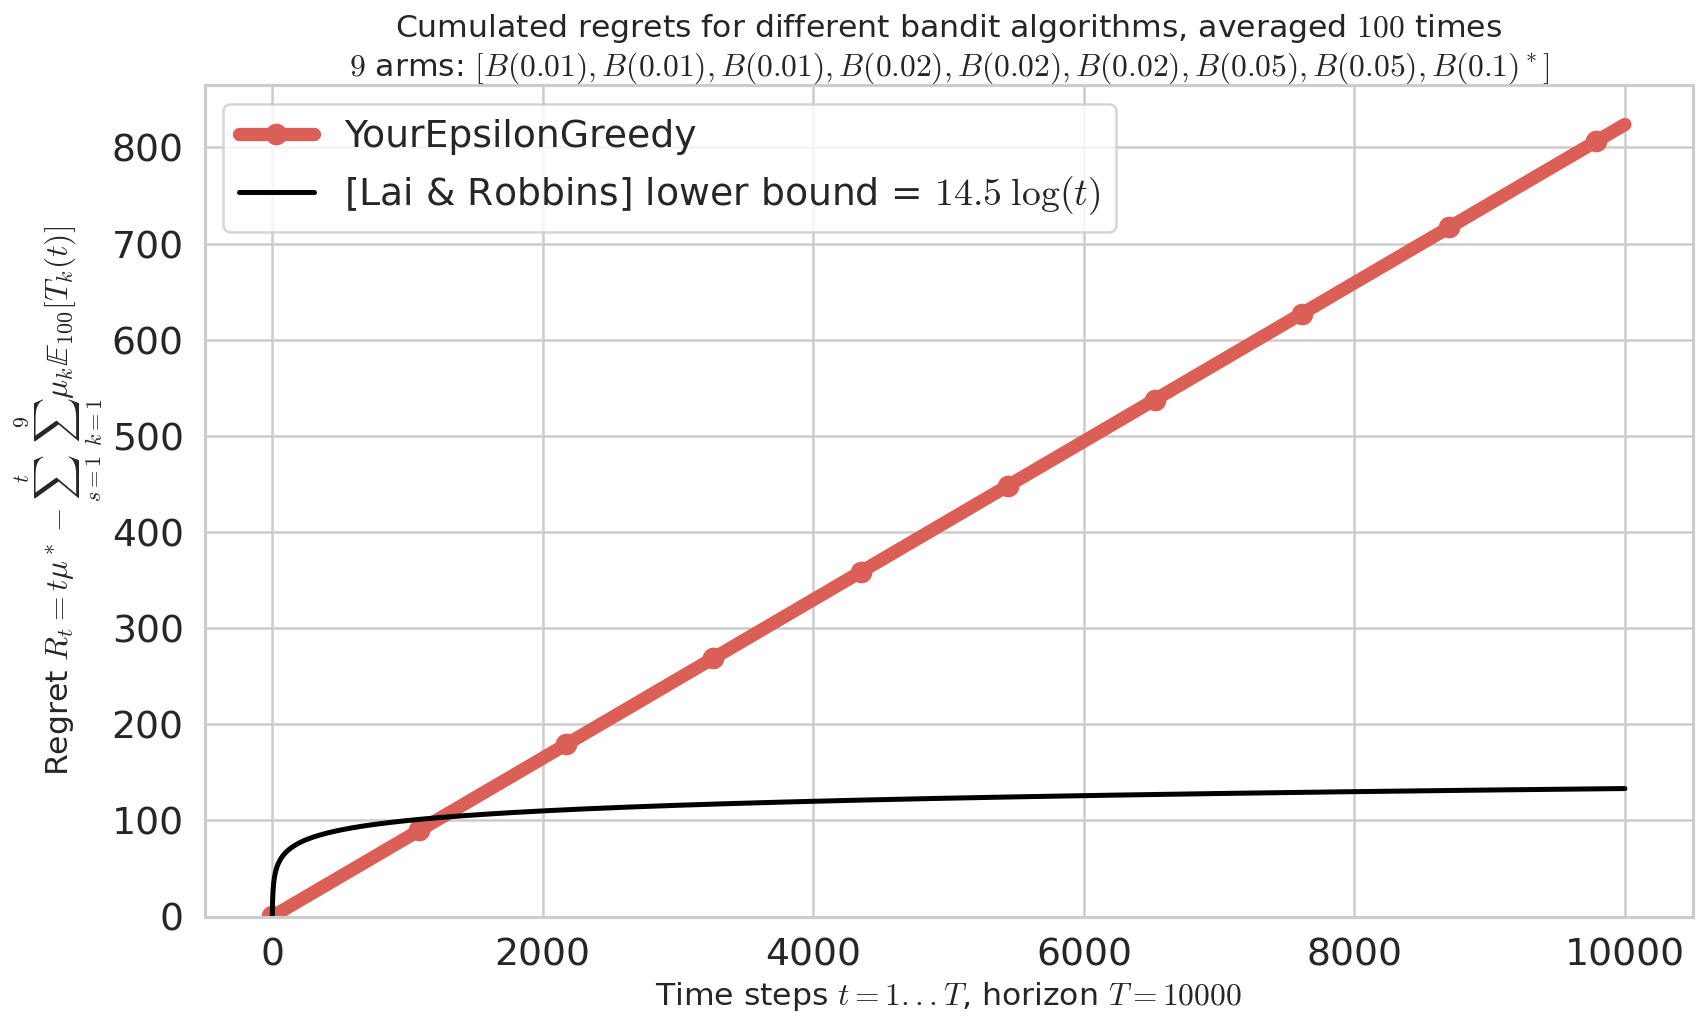

In [ ]:
envId = 2
plotAll(evaluation, envId)